In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px

In [8]:
#data['naps taken in preceding day'] = data['naps taken in preceding day'].apply(lambda x: 'no' if x == 0 else 'yes')
data = pd.read_csv('sleep_tracker.csv').dropna()
data['total sleep time'] = data['total sleep time'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
data['naps taken in preceding day'] = data['naps taken in preceding day'].apply(lambda x: 0.1 if x == 0 else 1)
data['length of nap(s)'] = data['length of nap(s)'].str.replace(' min', '')
data['length of nap(s)'] = data['length of nap(s)'].astype(int)
data['quality of sleep'] = data['quality of sleep'].astype(int)
data = data.rename(columns={"quality of sleep": "Quality of Sleep"})
data = data.rename(columns={'total sleep time': 'total_sleep_time', 'length of nap(s)': 'length of nap(s) (min)', 'naps taken in preceding day': 'Naps Taken?'})
#data.head(60)

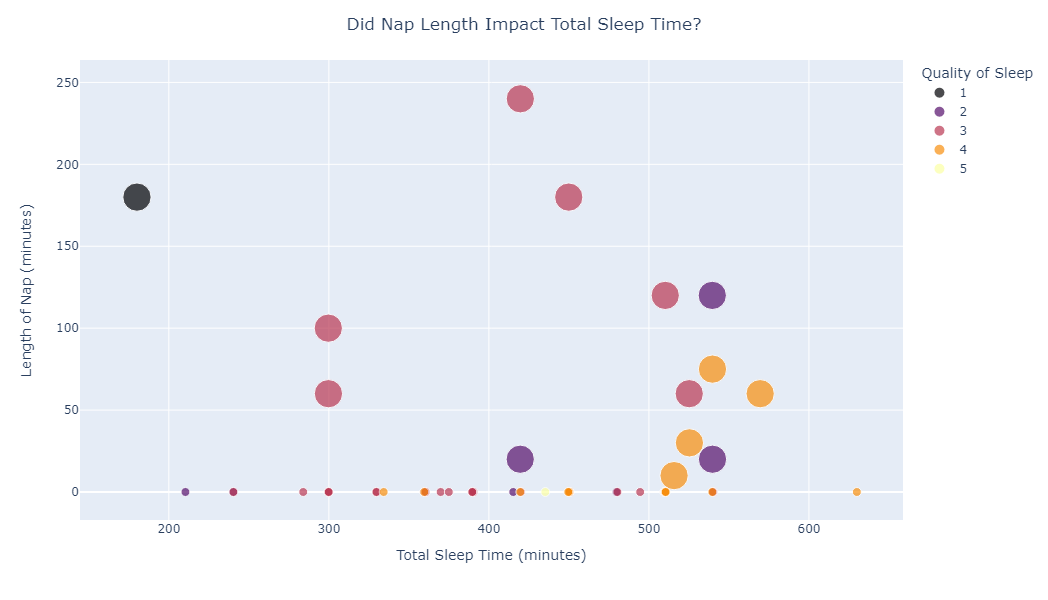

In [9]:
data['Quality of Sleep'] = data['Quality of Sleep'].astype(str)
category_order = ['1', '2', '3', '4', '5']
color_map = {
    '1': 'rgb(0,   0,   4)',   # Dark Grey
    '2': 'rgb(86,  16,  108)', # Purple
    '3': 'rgb(186, 56,  83)',  # Red
    '4': 'rgb(248, 143, 14)',  # Orange
    '5': 'rgb(252, 255, 164)'  # Yellow
}


# Jitter for the overlapping zero axis points. Kinda negligible, but it works
jitter = 0.5
data['total_sleep_time'] += np.random.uniform(-jitter, jitter, size = len(data))

fig = px.scatter(data, x = "total_sleep_time", y =  "length of nap(s) (min)",
                 hover_name = data["date (night of)"].str.upper(), 
                 color = "Quality of Sleep",
                 category_orders={"Quality of Sleep": category_order},
                 color_discrete_map = color_map,
                 size = 'Naps Taken?', size_max = 20,
                 labels = {'length of nap(s) (min)':'Length of Nap (minutes)', 'total_sleep_time':'Total Sleep Time (minutes)'},
                 hover_data = {'Naps Taken?':False, 'Quality of Sleep':False, 'total_sleep_time':':.0f'},
                 height = 600,
               )
fig.update_layout(title = "Did Nap Length Impact Total Sleep Time?", title_x = 0.5)

#fig.write_html('scatter.html')
#fig.write_image('scatter.png')
fig.show()